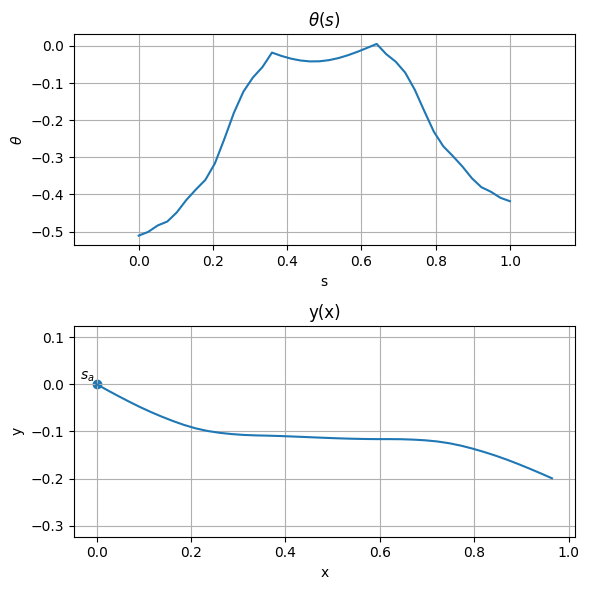

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize

def xy_coordinates(s, theta, x_s_a=0, y_s_a=0):
    """
    Na podlagi s, theta(s), x(s_a) in y(s_a) izračuna koordinate x(s) in y(s) ter nariše grafa theta(s) in y(x).
    """
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=x_s_a)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=y_s_a)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))

    ax1.plot(s, theta)
    ax1.set_title("$\\theta(s)$")
    ax1.set_ylabel("$\\theta$")
    ax1.set_xlabel("s")
    ax1.axis('equal')
    ax1.grid()

    ax2.plot(x, y)
    ax2.set_title("y(x)")
    ax2.set_ylabel("y")
    ax2.set_xlabel("x")
    ax2.axis('equal')
    ax2.grid()
    ax2.scatter(x_s_a, y_s_a)
    ax2.annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a-0.035, y_s_a+0.01))

    plt.tight_layout()
    plt.show()


def v(theta, p, s, h, r):
    n = len(theta)
    
    v0 = 0
    for i in range(n-1):
        v0 += (theta[i+1] - theta[i])**2
         
    v1 = 0
    for i in range(n):
        v1 += np.cos(theta[i])

    v2 = 0
    if r!=0:
        dy_ds = [np.sin(theta[0])]
        for i in range(1, n):
            dy_ds.append(np.sin(theta[i]))
            y = cumulative_trapezoid(dy_ds, s[:i+1], initial=0)[-1]
            if y**2 > h**2:
                v2 += (y-h)**2

    v = 0.5*v0 + p/(n+1)**2 * v1 + r*v2
    return v

n = 40
p = 10
h = 0.2
r = 1

s = np.linspace(0, 1, n)
theta0 = -np.sin(s*10)

sol = minimize(v, theta0, (p, s, h, r))

xy_coordinates(s, sol.x)

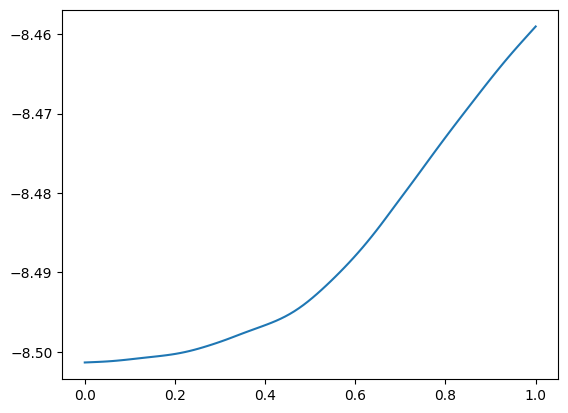

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize

def xy_coordinates(s, theta, x_s_a=0, y_s_a=0):
    """
    Na podlagi s, theta(s), x(s_a) in y(s_a) izračuna koordinate x(s) in y(s) ter nariše grafa theta(s) in y(x).
    """
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=x_s_a)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=y_s_a)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))

    ax1.plot(s, theta)
    ax1.set_title("$\\theta(s)$")
    ax1.set_ylabel("$\\theta$")
    ax1.set_xlabel("s")
    ax1.axis('equal')
    ax1.grid()

    ax2.plot(x, y)
    ax2.set_title("y(x)")
    ax2.set_ylabel("y")
    ax2.set_xlabel("x")
    ax2.axis('equal')
    ax2.grid()
    ax2.scatter(x_s_a, y_s_a)
    ax2.annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a-0.035, y_s_a+0.01))

    plt.tight_layout()
    plt.show()


def v(y, h, r, n, Tx, Ty):
    ds = 1/n 
    v0 = 0
    for i in range(n-2):
        v0 += ((y[i+2] - 2*y[i+1] + y[i])**2 / ds**4 
                - Ty * np.sin((y[i+1]-y[i])/ds) 
                + Tx * (1 - np.cos((y[i+1]-y[i])/ds)) 
                + r*max(0, y[i]**2 - h**2))    
    return v0

n = 100
h = 1
r = 0
Tx = 100
Ty = 0
x = np.linspace(0, 1, n)
y0 = np.cos(x)

sol = minimize(v, y0, (h, r, n, Tx, Ty))
y = sol.x
plt.plot(x, y);